In [21]:
import pandas as pd
import numpy as np
import pickle
import calendar
import matplotlib.pyplot as plt

In [24]:
# ice_cover_dir = '/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover/'

# df = pickle.load(open(f'{ice_cover_dir}clock_aust.p','rb'))
# df['doy'] = [x.timetuple().tm_yday for x in df['dt']]


# for x in np.arange(0,6):
#     max_cover = np.nanmax(df[x])
#     df[f'norm_{x}'] = df[x]/max_cover
# df.sort_values('dt',inplace=True)

# years = np.arange(2003,2024)

# df.to_csv('clock_aust.csv')

In [25]:
df = pd.read_csv('clock_flade.csv',parse_dates=['dt'])

In [10]:
thresh=0.5

owd = {}

for x in np.arange(0,6):
    
    open_water_days=[]
    
    for year in years:

        # do all year

        df_yr = df[df['year']==year]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]

        all_days_OW = df_yr.shape[0]

        # do DJF
        
        df_yr = df[df['year']==year]

        if calendar.isleap(year): feb_days=29
        else: feb_days=28
        
        df_yr = df_yr[(df_yr['doy']<=31+feb_days)]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]
        
        days0 =  df_yr.shape[0]
        
        df_yr = df[df['year']==year-1]
        
        df_yr = df_yr[(df_yr['doy']>=365-31)]

        df_yr = df_yr[df_yr[f'norm_{x}']<thresh]
        
        days1 =  df_yr.shape[0]
        
        DJF_days_OW = days0+days1

        open_water_days.append( {'year':year,f'all_days_OW_{x+1}':all_days_OW,f'DJF_days_OW_{x+1}':DJF_days_OW })

    owd[x] = pd.DataFrame(open_water_days)

# for key,df in data.items():

#     df.to_hdf(f'{ice_cover_dir}outputs/{site}_Cover.h5',key=f'rad_thresh_{key}pc',mode='a')

In [17]:
lod=[]
for key, value in owd.items():
    lod.append(value)
df = pd.concat(lod,axis=1)
df = df.loc[:,~df.columns.duplicated()].copy()
df.to_csv('austfonna_clockface.csv')
df

,year,all_days_OW_1,DJF_days_OW_1,all_days_OW_2,DJF_days_OW_2,all_days_OW_3,DJF_days_OW_3,all_days_OW_4,DJF_days_OW_4,all_days_OW_5,DJF_days_OW_5,all_days_OW_6,DJF_days_OW_6
0,2003,30,1,54,0,93,0,66,0,139,18,78,11
1,2004,147,5,125,0,114,0,104,1,255,13,177,12
2,2005,115,18,103,0,104,0,84,1,264,74,134,49
3,2006,270,48,241,13,242,14,157,6,326,86,287,77
4,2007,207,47,163,30,149,27,120,3,240,79,201,71
5,2008,34,52,67,16,99,5,57,7,167,75,114,59
6,2009,115,14,152,1,162,4,66,8,174,43,107,32
7,2010,171,48,148,14,129,3,99,2,244,77,152,74
8,2011,118,0,136,0,164,0,115,0,185,10,136,5
9,2012,304,56,226,9,217,10,141,12,332,91,305,73


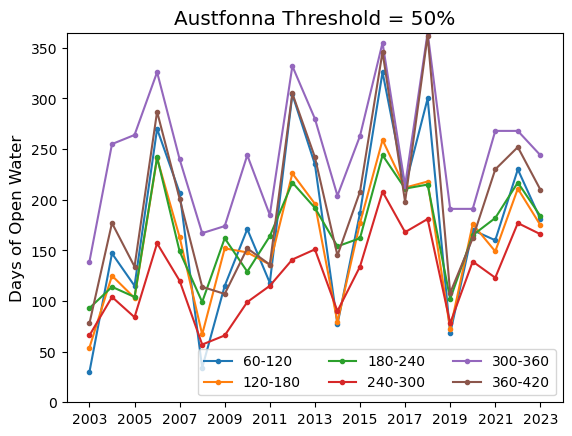

In [20]:
for i in np.arange(1,7):
    plt.plot(df['year'],df[f'all_days_OW_{i}'],label=f'{i*60}-{(i+1)*60}',marker='.')

plt.title('Austfonna Threshold = 50%',fontsize='x-large')
plt.ylabel('Days of Open Water',fontsize='large')
plt.xticks(years[::2])
plt.ylim(0,365)
plt.legend(ncols=3,loc='lower right')
plt.show()